# Центральная предельная теорема своими руками

#### Домашнее задание. Неделя 4.

Внимание: используется Python 3.

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
%matplotlib inline

В качестве любимого непрерывного рапределения выбираем распределение Стьюдента. Оно хоть и похоже на нормальное распределение, но имеет некоторые особенности. <br>
<br>Для начала выберем n или df (degree of freedom - степень свободы) равную 50 и сгенерируем выборку объемом 1000.

In [2]:
df = 50
student_rv = t(df)
sample = student_rv.rvs(1000)

Следующим шагом построим гистограмму и поверх неё нарисуем теоретическую плотность распределения нашей случайной величины.

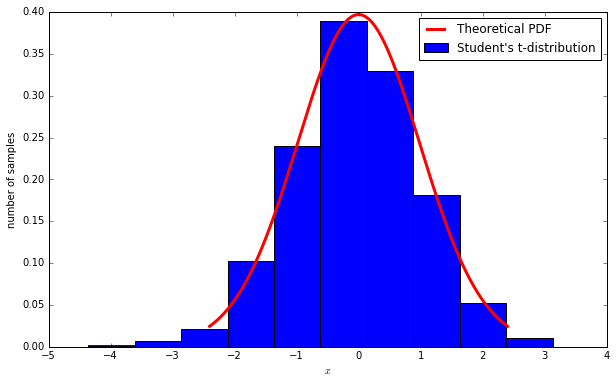

In [3]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(sample, normed=True, label = "Student's t-distribution", color = 'blue')
# Считаем теоретическую плотность распределения нашей случайной величины
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 1000)
plt.plot(x, student_rv.pdf(x), label='Theoretical PDF', color = 'red', linewidth = 3.0)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend()

Согласно Википедии, **математическое ожидание** распределения Стьюдента равно: $$0, если\,n>1;$$ 
<br> **дисперсия** равна: $$\frac{n}{n-2}, если\,n>2$$
<br>Вычислим дисперсию (σ) и мат.ожидание (μ).

In [4]:
mu = 0 # мат.ожидание
sigma = df/(df-2) # дисперсия

Вычислим среднее нашей случайной величины при значении n равному 5 и построим гистограмму распределения.
Затем вычислим плотность соответствующего нормального распределения согласно центральной предельной теореме. Стоит обратить внимание, что на вход она принимает не дисперсию, а стандартное отклонение. Отобразим на плоте.

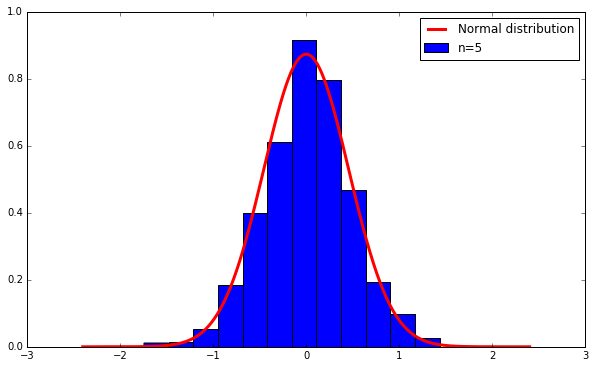

In [5]:
n = 5
# вычислим среднее
mean = np.zeros(1000)
for i in range(1000):
     mean[i] = np.average(student_rv.rvs(n))
# нариусем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(mean, bins=12, normed=True, label="n=5", color = 'blue')
# рассчитаеем нормальное распределение
norm_rv = norm(loc=mu, scale=np.sqrt(sigma / n))
# рассчитаем плотность нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution", color = 'red', linewidth = 3.0)
plt.legend()

Далее повторим предыдущие операции но для значения n 10.

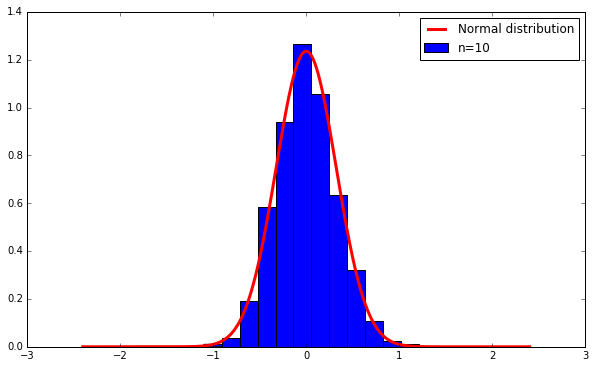

In [6]:
n = 10
# вычислим среднее
mean = np.zeros(1000)
for i in range(1000):
     mean[i] = np.average(student_rv.rvs(n))
# нариусем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(mean, bins=12, normed=True, label="n=10", color = 'blue')
# рассчитаеем нормальное распределение
norm_rv = norm(loc=mu, scale=np.sqrt(sigma / n))
# рассчитаем плотность нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution", color = 'red', linewidth = 3.0)
plt.legend()

Теперь повторим предыдущие операции для значения n 50.

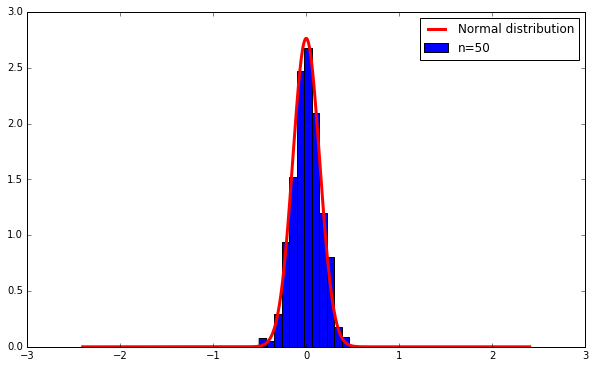

In [7]:
n = 50
# вычислим среднее
mean = np.zeros(1000)
for i in range(1000):
     mean[i] = np.average(student_rv.rvs(n))
# нариусем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(mean, bins=12, normed=True, label="n=50", color = 'blue')
# рассчитаеем нормальное распределение
norm_rv = norm(loc=mu, scale=np.sqrt(sigma / n))
# рассчитаем плотность нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution", color = 'red', linewidth = 3.0)
plt.legend()

В последнем эксперименте повторим предыдущие операции для значения n 100.

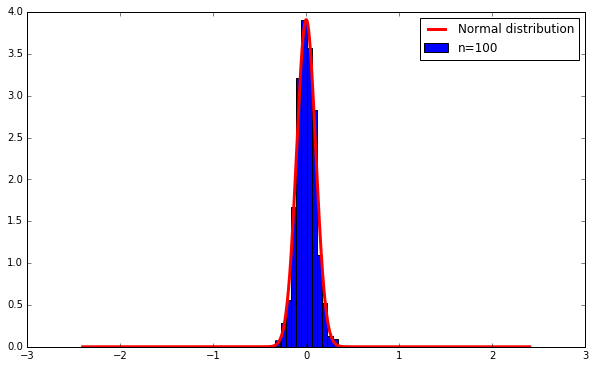

In [8]:
n = 100
# вычислим среднее
mean = np.zeros(1000)
for i in range(1000):
     mean[i] = np.average(student_rv.rvs(n))
# нариусем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(mean, bins=12, normed=True, label="n=100", color = 'blue')
# рассчитаеем нормальное распределение
norm_rv = norm(loc=mu, scale=np.sqrt(sigma / n))
# рассчитаем плотность нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution", color = 'red', linewidth = 3.0)
plt.legend()

### Выводы

Наверное, самым главным выводом можно считать проверку и доказательство работы Центральной предельной теоремы. Действительно, при увеличении объема выборки увеличивается точность аппроксимации данного рапределения нормальным. Иными словами, при увеличении выборки средние значения данного распределения приближаются к нормальному распределению. 